### Student Information
Name:卓鈺博

Student ID:113033624

GitHub ID:Paul901003

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [60]:
### Begin Assignment Here
from datasets import load_dataset

ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

In [61]:
# import library
import pandas as pd
import numpy as np

import nltk

from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import CountVectorizer

import plotly as py
import math
import PAMI

import umap
%matplotlib inline

In [62]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
#轉成dataframe
df = pd.DataFrame(
    {"sentiment":ds["train"]["sentiment"],
     "comment":ds["train"]["comment"]})
df

,sentiment,comment
0,not nostalgia,He was a singer with a golden voice that I lov...
1,nostalgia,The mist beautiful voice ever I listened to hi...
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...
4,nostalgia,listening to his songs reminds me of my mum wh...
...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,....."
1496,not nostalgia,it's sad this is such a beautiful song when yo...
1497,not nostalgia,"Dear Friend, I think age and time is not that ..."
1498,nostalgia,I was born in 1954 and started to be aware of ...


Exercise 1

In [64]:
for text in df.comment[:3]:
    print(text)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.


Exercise 2

In [65]:
df[(df['sentiment'] == 'nostalgia') & (df['comment'].str.contains('song'))]

,sentiment,comment
2,nostalgia,I have most of Mr. Reeves songs. Always love ...
4,nostalgia,listening to his songs reminds me of my mum wh...
5,nostalgia,"Every time I heard this song as a child, I use..."
11,nostalgia,this song came out my senior year in high scho...
13,nostalgia,I am 47 and grew up on songs of this type. I ...
...,...,...
1482,nostalgia,"Love the song, brings me back to a better plac..."
1484,nostalgia,My dad always played this song for mom when i ...
1487,nostalgia,I really love this song. My dad always turns 6...
1492,nostalgia,i used to cry over this song cause i had a boy...


Exercise 3

In [66]:
df[df['sentiment'] == 'nostalgia'].iloc[::10][0:5]

,sentiment,comment
1,nostalgia,The mist beautiful voice ever I listened to hi...
18,nostalgia,"My Grandparents had a pub in the 1970's, this ..."
32,nostalgia,I remember my Mom listening to Jim over and ov...
50,nostalgia,"If I remember correctly, this song came out af..."
71,nostalgia,Gosh does this bring back memories. Nearly eve...


In [67]:
# Missing Values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


Exercise 4

In [68]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

Dealing with Duplicate Data

In [69]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [70]:
print(f'sum of duplicated data before drop : {sum(df.duplicated())}')
print(f"sum of duplicated comment before drop : {sum(df.duplicated('comment'))}")
print(f'length before drop : {len(df)}')

sum of duplicated data before drop : 1
sum of duplicated comment before drop : 1
length before drop : 1500


In [71]:
df.drop_duplicates(keep=False, inplace=True)
print(f'sum of duplicated data after drop : {sum(df.duplicated())}')
print(f"sum of duplicated comment after drop : {sum(df.duplicated('comment'))}")
print(f'length after drop : {len(df)}')

sum of duplicated data after drop : 0
sum of duplicated comment after drop : 0
length after drop : 1498


Exercise 6

In [76]:
df_sample = df.sample(n=1000)
print(len(df_sample))
df_sample[0:4]

1000


,sentiment,comment
110,not nostalgia,I grew up hard and never learned how to love a...
153,not nostalgia,One of the finest hit singles of 1960 as I do ...
606,not nostalgia,Lately i do not know who sang this song which ...
424,not nostalgia,Listening 2019 A classic romantic song .What...


In [78]:
print(f"df length: {len(df)}")
print(f"Sampled df length: {len(df_sample)}")

# 是否有重複採樣
print('--')
print(sum(df.duplicated()))
print('--')
print(sum(df.duplicated('comment')))

print("原始數據分布:")
print(df['sentiment'].value_counts())

print("\n採樣數據分布:")
print(df_sample['sentiment'].value_counts())

vectorizer = CountVectorizer()
df_counts = vectorizer.fit_transform(df['comment'])
df_sample_counts = vectorizer.transform(df_sample['comment'])

# 詞的出現頻率
original_word_counts = df_counts.sum(axis=0)
sample_word_counts = df_sample_counts.sum(axis=0)

print("原始數據集語詞出現頻率：")
print(df_counts.sum(axis=0))

print("\n採樣數據集語詞出現頻率：")
print(df_sample_counts.sum(axis=0))

print("觀察以上結果可以發現")
print("採樣後數據分布和語詞的出現頻率皆有發生變化")


df length: 1498
Sampled df length: 1000
--
0
--
0
原始數據分布:
sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64

採樣數據分布:
sentiment
nostalgia        504
not nostalgia    496
Name: count, dtype: int64
原始數據集語詞出現頻率：
[[1 2 1 ... 1 1 1]]

採樣數據集語詞出現頻率：
[[1 1 0 ... 1 0 1]]
觀察以上結果可以發現
採樣後數據分布和語詞的出現頻率皆有發生變化


Exercise 7

sentiment
nostalgia        504
not nostalgia    496
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

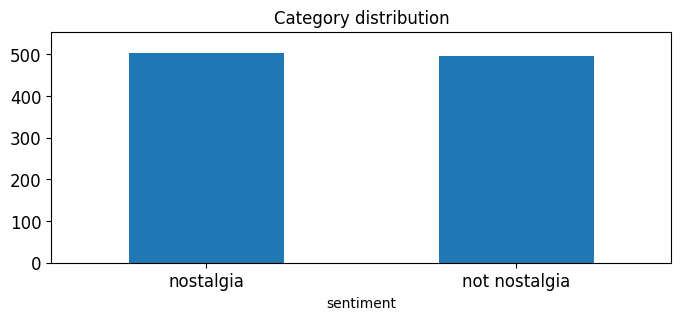

In [80]:
upper_bound = max(df_sample.sentiment.value_counts() + 50)
print(df_sample.sentiment.value_counts())

# plot barchart for X_sample
df_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Exercise 8

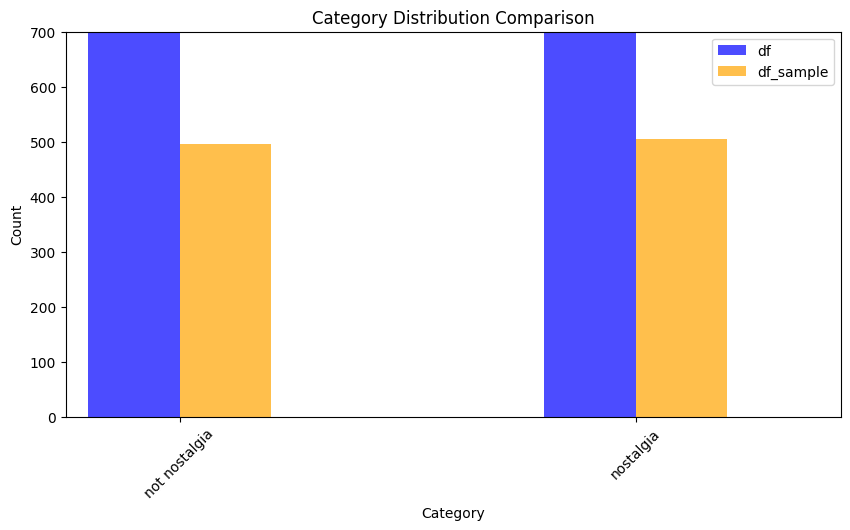

In [82]:
df_counts = df.sentiment.value_counts()
df_sample_counts = df_sample.sentiment.value_counts()

# Align the two datasets to handle cases where they have different categories
all_categories = set(df_counts.index).union(set(df_sample_counts.index))
df_counts = df_counts.reindex(all_categories, fill_value=0)
df_sample_counts = df_sample_counts.reindex(all_categories, fill_value=0)

# Plot the combined bar chart
plt.figure(figsize=(10, 5))
df_counts.plot(kind='bar', color='blue', alpha=0.7, label='df', width=0.2, position=1)
df_sample_counts.plot(kind='bar', color='orange', alpha=0.7, label='df_sample', width=0.2, position=0)

# Customize plot
plt.title('Category Distribution Comparison')
plt.xlabel('Category')
plt.ylabel('Count')
plt.ylim([0, 700])  # Adjust as needed based on your data range
plt.legend()
plt.xticks(rotation=45)
plt.show()


Feature Creation

In [83]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [88]:
df['unigrams'] = df['comment'].apply(lambda x: dmh.tokenize_text(x))
print(df[0:4]["unigrams"])
df[0:4]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object


,sentiment,comment,unigrams
0,not nostalgia,He was a singer with a golden voice that I lov...,"[He, was, a, singer, with, a, golden, voice, t..."
1,nostalgia,The mist beautiful voice ever I listened to hi...,"[The, mist, beautiful, voice, ever, I, listene..."
2,nostalgia,I have most of Mr. Reeves songs. Always love ...,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,not nostalgia,30 day leave from 1st tour in Viet Nam to conv...,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.comment) #learn the vocabulary and return document-term matrix
print(df_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 45 stored elements and shape (1, 3730)>
  Coords	Values
  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


Exercise 9

In [92]:
analyze = count_vect.build_analyzer()
analyze(df.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [93]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

Exercise 10

In [106]:
print(df_counts[0:5, 0:100].toarray())
for i in range(100):
    num = df_counts[3:4, i:i+1].toarray()
    if bool(num == 1):
        print(num)
        word = count_vect.get_feature_names_out()[i]
        print(word)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 

In [107]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = df_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

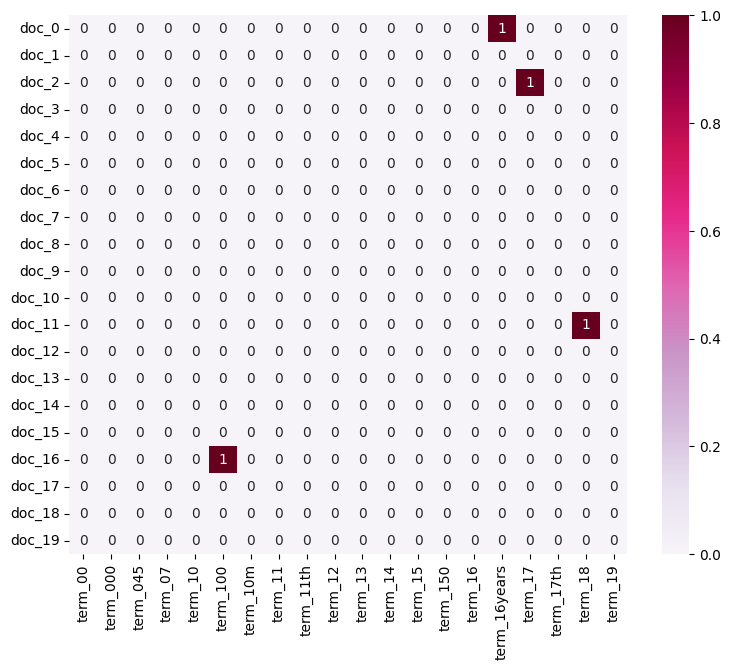

In [108]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Exercise 11

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 11603 stored elements and shape (1498, 40)>
  Coords	Values
  (0, 9)	1
  (0, 34)	2
  (0, 37)	1
  (0, 29)	1
  (0, 16)	1
  (0, 33)	1
  (0, 0)	2
  (0, 30)	3
  (0, 32)	2
  (0, 7)	1
  (0, 21)	1
  (0, 11)	1
  (0, 1)	2
  (0, 35)	1
  (0, 8)	1
  (0, 5)	1
  (0, 6)	2
  (0, 39)	2
  (1, 34)	1
  (1, 16)	1
  (1, 33)	1
  (1, 30)	2
  (1, 21)	1
  (1, 1)	1
  (1, 4)	1
  :	:
  (1495, 27)	1
  (1495, 19)	1
  (1496, 9)	1
  (1496, 34)	2
  (1496, 16)	1
  (1496, 33)	2
  (1496, 30)	1
  (1496, 21)	3
  (1496, 11)	2
  (1496, 1)	3
  (1496, 8)	1
  (1496, 20)	2
  (1496, 13)	1
  (1496, 38)	1
  (1496, 31)	1
  (1496, 2)	1
  (1496, 19)	1
  (1497, 16)	1
  (1497, 30)	2
  (1497, 11)	2
  (1497, 20)	2
  (1497, 12)	1
  (1497, 38)	2
  (1497, 31)	3
  (1497, 27)	2
找出15個出現頻率最高的詞作圖


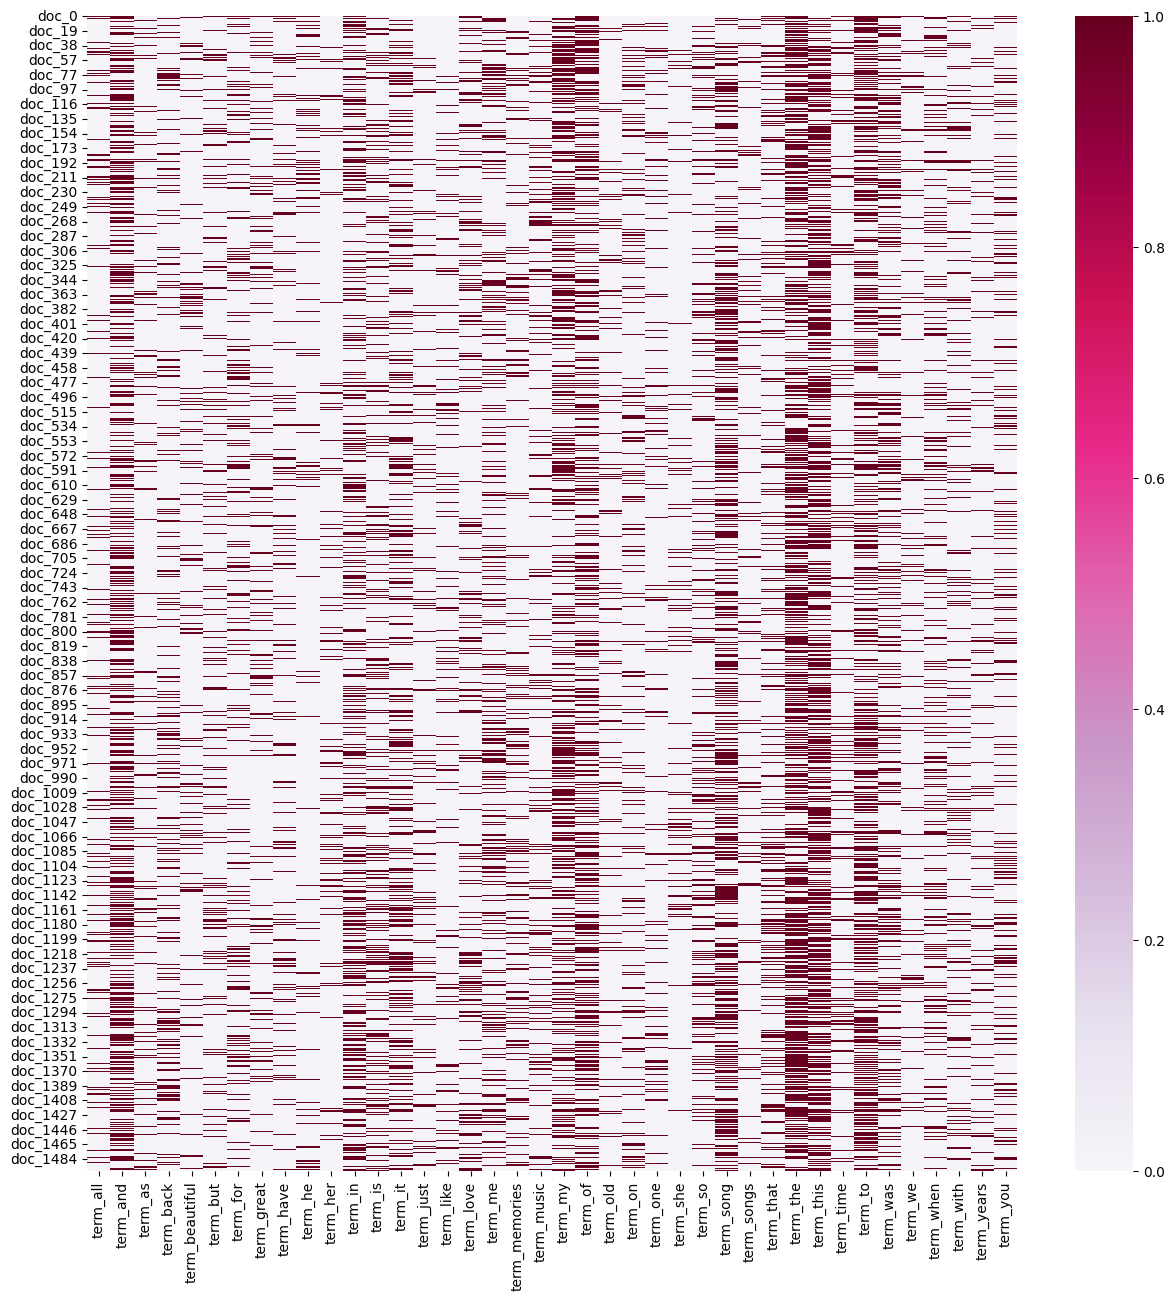

In [110]:
count_vect = CountVectorizer(max_features=40)
df_counts = count_vect.fit_transform(df['comment'])
print(df_counts)

selected = None
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:selected]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:selected]]
plot_z = df_counts[0:selected, 0:selected].toarray() #X_counts[how many documents, how many terms]
plot_z

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

print('找出15個出現頻率最高的詞作圖')

Attribute Transformation / Aggregation